In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_reviews = pd.read_csv("../data/processed/reviews_with_sentiment.csv")
df_reviews.head()

,review_id,review_text,rating,review_date,bank_code,bank_name,source,bert_sentiment,bert_score,bert_numeric
0,0,🙏👍,5,2025-11-29,BOA,Bank of Abyssinia,Google Play,NEGATIVE,0.697057,-1
1,1,Very Good,5,2025-11-28,BOA,Bank of Abyssinia,Google Play,POSITIVE,0.999852,1
2,2,goof,5,2025-11-28,BOA,Bank of Abyssinia,Google Play,NEGATIVE,0.997528,-1
3,3,good!,5,2025-11-28,BOA,Bank of Abyssinia,Google Play,POSITIVE,0.999827,1
4,4,good jop,5,2025-11-27,BOA,Bank of Abyssinia,Google Play,POSITIVE,0.999841,1


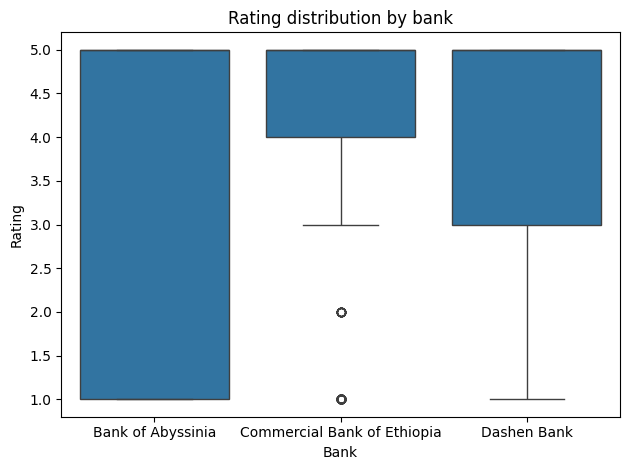

In [5]:
sns.boxplot(data=df_reviews, x='bank_name', y='rating')
plt.title('Rating distribution by bank')
plt.xlabel('Bank')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


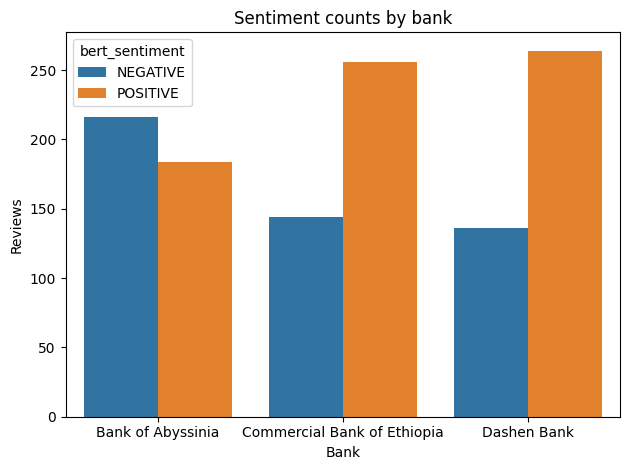

In [10]:
comp = (df_reviews.groupby(['bank_name','bert_sentiment']).size()
          .reset_index(name='count'))
sns.barplot(data=comp, x='bank_name', y='count', hue='bert_sentiment')
plt.title('Sentiment counts by bank')
plt.xlabel('Bank')
plt.ylabel('Reviews')
plt.tight_layout()
plt.show()


C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_9172\1659732291.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_pos = pos_kw.groupby('bank_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


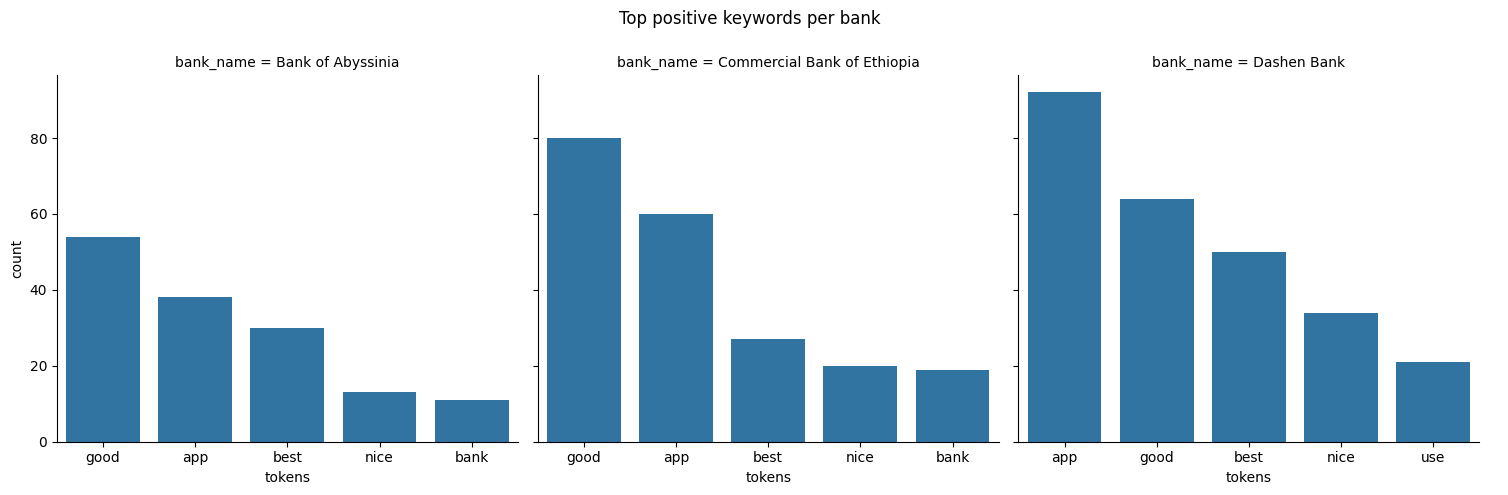

C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_9172\1659732291.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_neg = neg_kw.groupby('bank_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


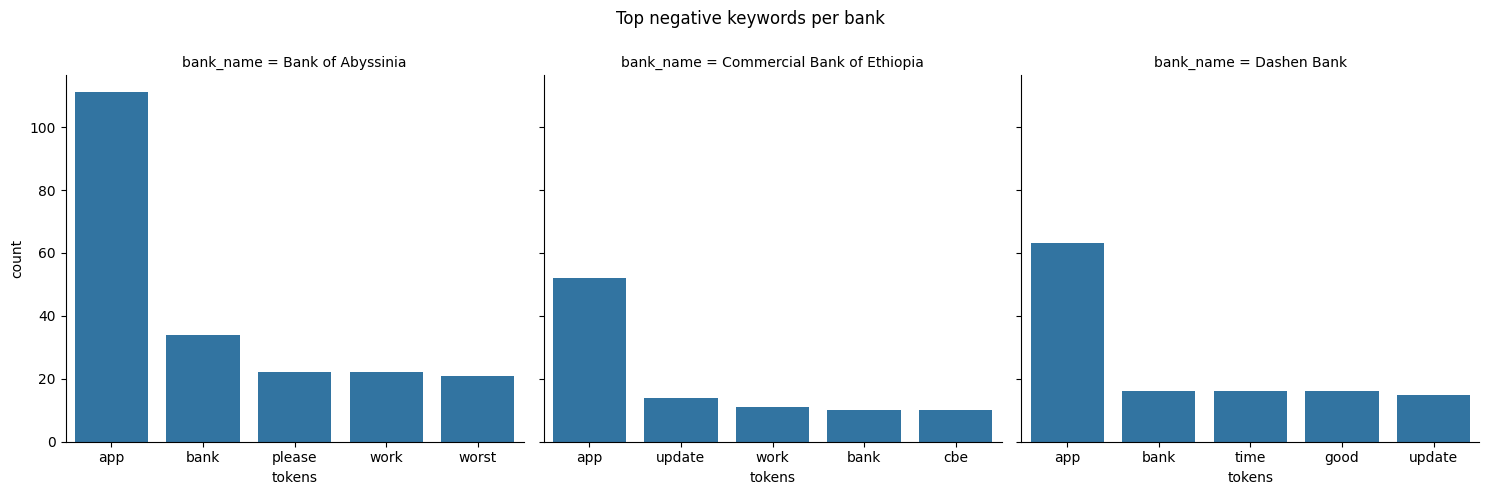

In [14]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def tokenize_clean(text):
    tokens = re.findall(r'\b[a-zA-Z]{3,}\b', str(text).lower())
    return [t for t in tokens if t not in stop_words]

df_reviews['tokens'] = df_reviews['review_text'].apply(tokenize_clean)


pos_kw = (df_reviews[df_reviews['bert_sentiment']=='POSITIVE']
          .explode('tokens').groupby(['bank_name','tokens'])
          .size().sort_values(ascending=False).groupby(level=0).head(10).reset_index(name='count'))

neg_kw = (df_reviews[df_reviews['bert_sentiment']=='NEGATIVE']
          .explode('tokens').groupby(['bank_name','tokens'])
          .size().sort_values(ascending=False).groupby(level=0).head(10).reset_index(name='count'))


top_pos = pos_kw.groupby('bank_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
sns.catplot(data=top_pos, x='tokens', y='count', col='bank_name', kind='bar', sharex=False)
plt.subplots_adjust(top=0.85); plt.suptitle('Top positive keywords per bank'); plt.show()

top_neg = neg_kw.groupby('bank_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
sns.catplot(data=top_neg, x='tokens', y='count', col='bank_name', kind='bar', sharex=False)
plt.subplots_adjust(top=0.85); plt.suptitle('Top negative keywords per bank'); plt.show()
